#  Customer Exited Prediction Project

In this project, we take on the role of a Data Analyst at a fictional bank  with the goal of analyzing customer behavior and building a model to predict whether customers will exit the service.

Using a real-world dataset containing customer demographics, product usage, and transaction details, we perform exploratory data analysis (EDA) to uncover key patterns and identify the main factors that influence customer exit. We then build a machine learning model to help the Strategy team make informed decisions to improve customer retention.

 Project Objectives:
- Analyze the reasons why customers exited the bank.
- Build a predictive model to identify customers with a high risk of exiting.
- Provide actionable recommendations based on model insights.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('data/Churn_Modelling.csv')

In [8]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [12]:
df = df.drop(['RowNumber', 'Surname'], axis=1)

In [14]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [16]:
df.isna().sum()

CustomerId         0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [28]:
# Adding age_group collumn
bins = [0, 12, 18, 35, 50, 65, 100]
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Middle Age', 'Senior']
df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [36]:
df['Age_group'] = df['Age_group'].astype(object)
age_group_counts = df['Age_group'].value_counts()
print(age_group_counts)

Age_group
Adult          4586
Young Adult    4131
Middle Age      997
Senior          264
Teenager         22
Name: count, dtype: int64


In [38]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_group
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Adult
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Adult
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Adult
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Adult
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Adult


## EDA

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

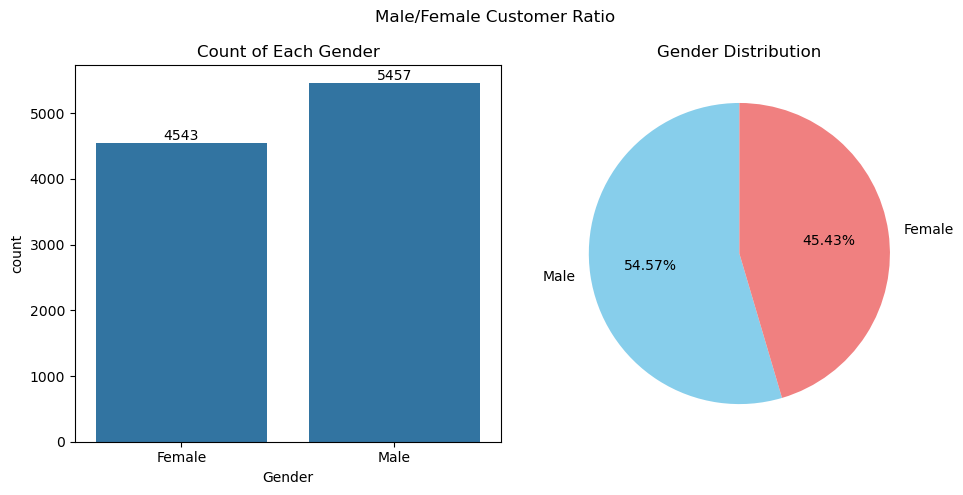

In [48]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
ax = sns.countplot(data=df, x="Gender")
ax.bar_label(ax.containers[0]) 
plt.title("Count of Each Gender")

plt.subplot(1, 2, 2)
df['Gender'].value_counts().plot.pie(autopct="%.2f%%", startangle=90, colors=["skyblue", "lightcoral"])
plt.ylabel("") 
plt.title("Gender Distribution")

plt.suptitle("Male/Female Customer Ratio")
plt.tight_layout()
plt.show()

>  **Conclusion:** The bank has a higher number of male customers than female customers (accounting for 54.57% of total customers)

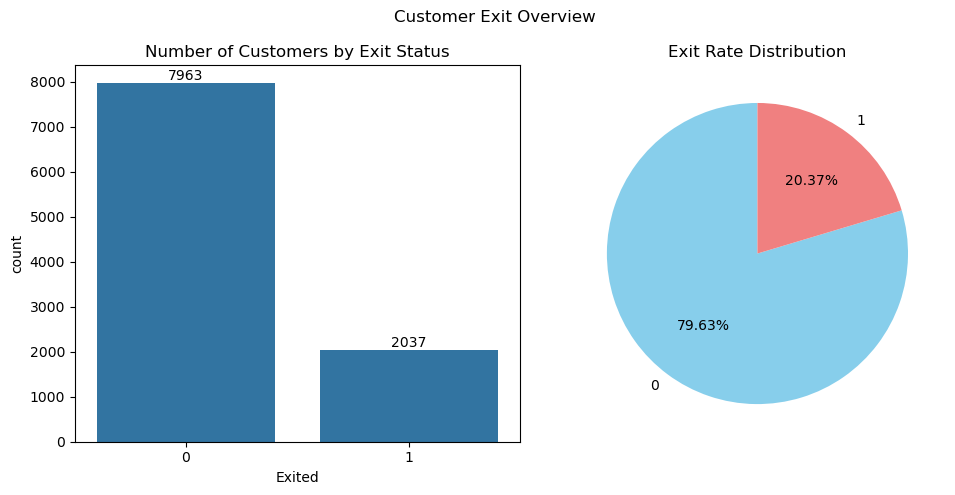

In [53]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
ax = sns.countplot(data=df, x="Exited")
ax.bar_label(ax.containers[0]) 
plt.title("Number of Customers by Exit Status")

plt.subplot(1, 2, 2)
df['Exited'].value_counts().plot.pie(autopct="%.2f%%", startangle=90, colors=["skyblue", "lightcoral"])
plt.ylabel("") 
plt.title("Exit Rate Distribution")

plt.suptitle("Customer Exit Overview")
plt.tight_layout()
plt.show()

>  **Conclusion:** The proportion of customers who left and no longer use the service is only around 20.37%.

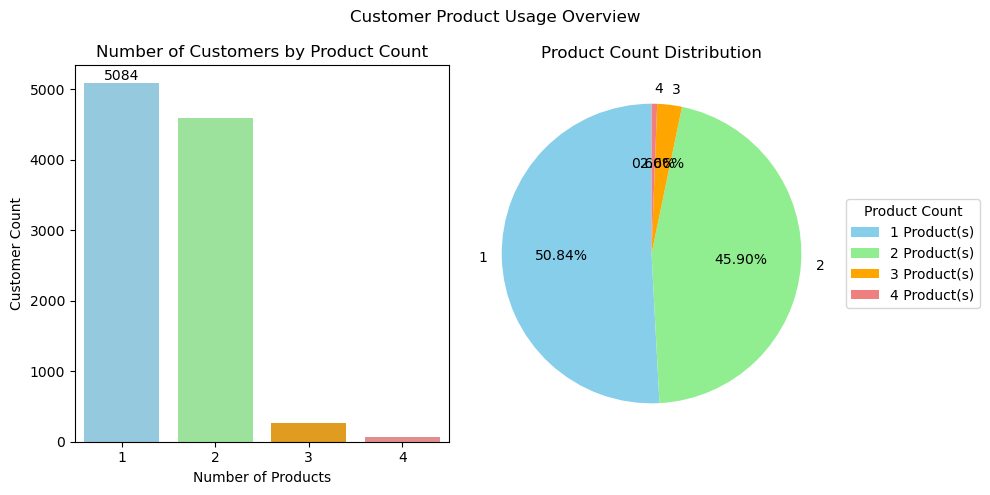

In [61]:
colors = ["skyblue", "lightgreen", "orange", "lightcoral"]
labels = df['NumOfProducts'].value_counts().sort_index().index.tolist()
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
ax = sns.countplot(data=df, x="NumOfProducts", palette=colors)
ax.bar_label(ax.containers[0])
plt.title("Number of Customers by Product Count")
plt.xlabel("Number of Products")
plt.ylabel("Customer Count")

plt.subplot(1, 2, 2)
wedges, texts, autotexts = plt.pie(
    df['NumOfProducts'].value_counts().sort_index(),
    autopct="%.2f%%",
    startangle=90,
    colors=colors,
    labels=labels,
    textprops={'color':"black"}
)
plt.title("Product Count Distribution")
plt.ylabel("")
plt.legend(wedges, [f"{l} Product(s)" for l in labels], title="Product Count", loc="center left", bbox_to_anchor=(1, 0.5))

plt.suptitle("Customer Product Usage Overview")
plt.tight_layout()
plt.show()

>  **Conclusion:** Most customers use only 1 to 2 products offered by the bank.

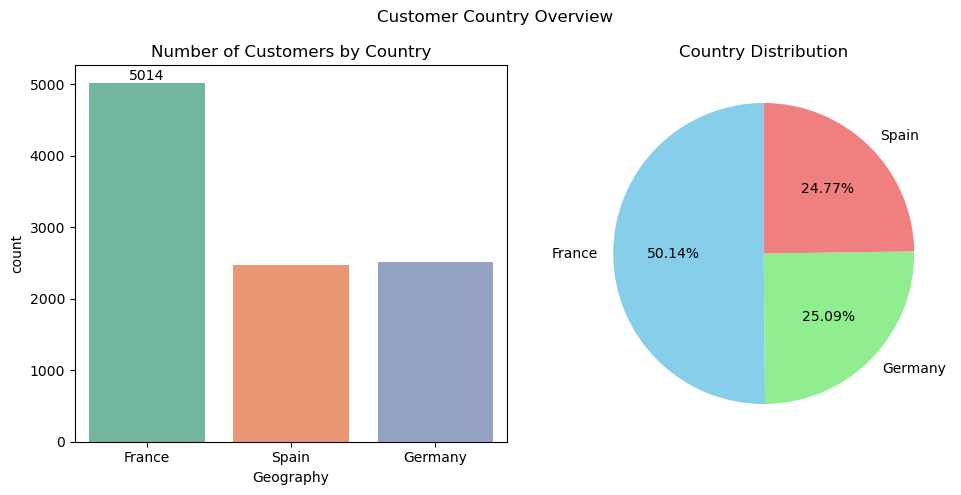

In [69]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
ax = sns.countplot(data=df, x="Geography", palette="Set2")
ax.bar_label(ax.containers[0])
plt.title("Number of Customers by Country")

plt.subplot(1, 2, 2)
df['Geography'].value_counts().plot.pie(
    autopct="%.2f%%", 
    startangle=90, 
    colors=["skyblue", "lightgreen", "lightcoral"]
)
plt.ylabel("")
plt.title("Country Distribution")

plt.suptitle("Customer Country Overview")
plt.tight_layout()
plt.show()

>  **Conclusion** France is the country with the highest number of customers.

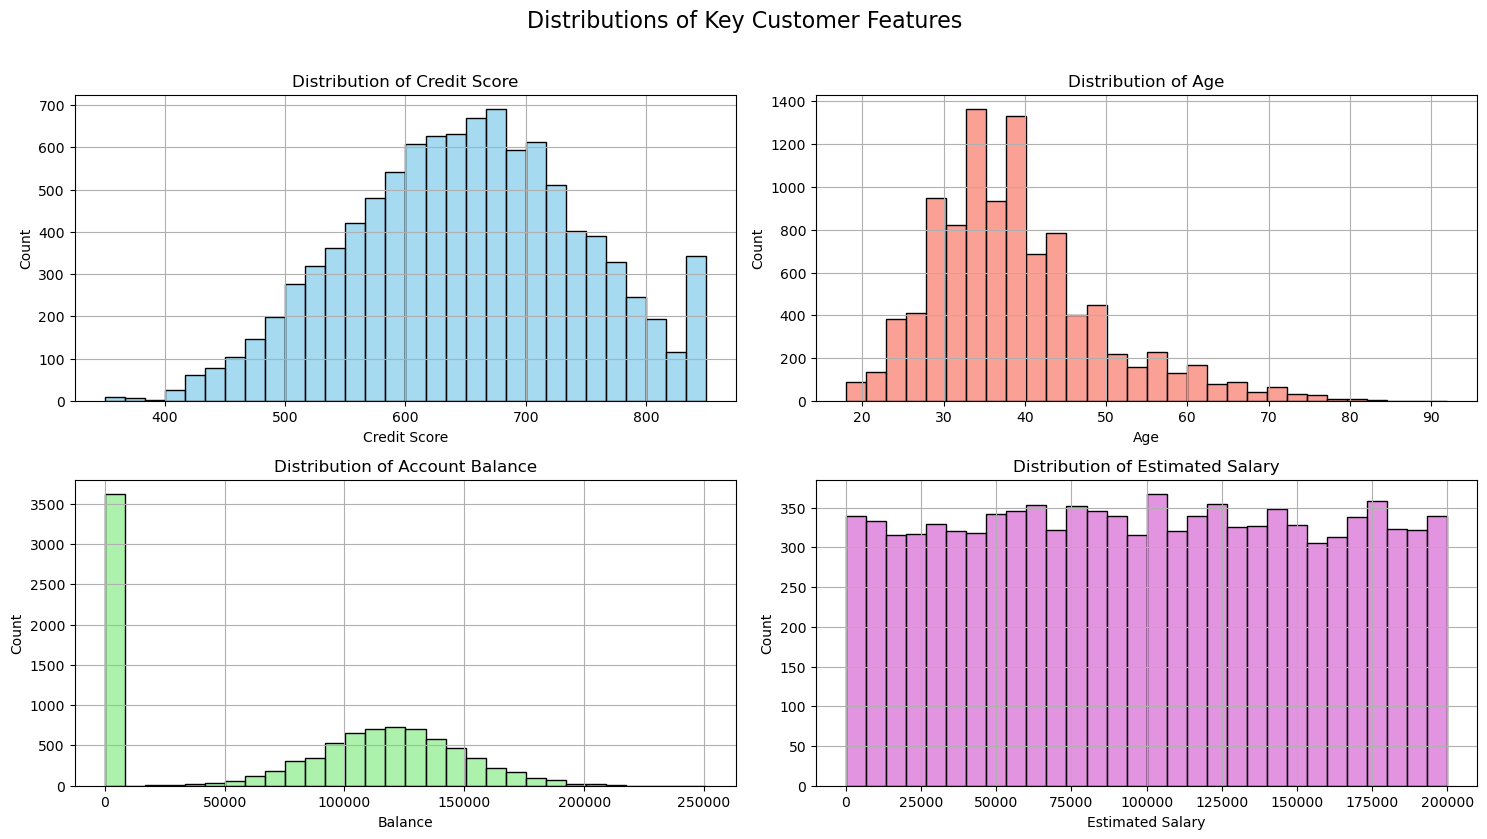

In [76]:
plt.figure(figsize=(15, 12))

plt.subplot(3, 2, 1)
sns.histplot(x=df['CreditScore'], kde=False, bins=30, color='skyblue')
plt.title('Distribution of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.grid(True)

plt.subplot(3, 2, 2)
sns.histplot(x=df['Age'], kde=False, bins=30, color='salmon')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)

plt.subplot(3, 2, 3)
sns.histplot(x=df['Balance'], kde=False, bins=30, color='lightgreen')
plt.title('Distribution of Account Balance')
plt.xlabel('Balance')
plt.ylabel('Count')
plt.grid(True)

plt.subplot(3, 2, 4)
sns.histplot(x=df['EstimatedSalary'], kde=False, bins=30, color='orchid')
plt.title('Distribution of Estimated Salary')
plt.xlabel('Estimated Salary')
plt.ylabel('Count')
plt.grid(True)

plt.suptitle("Distributions of Key Customer Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

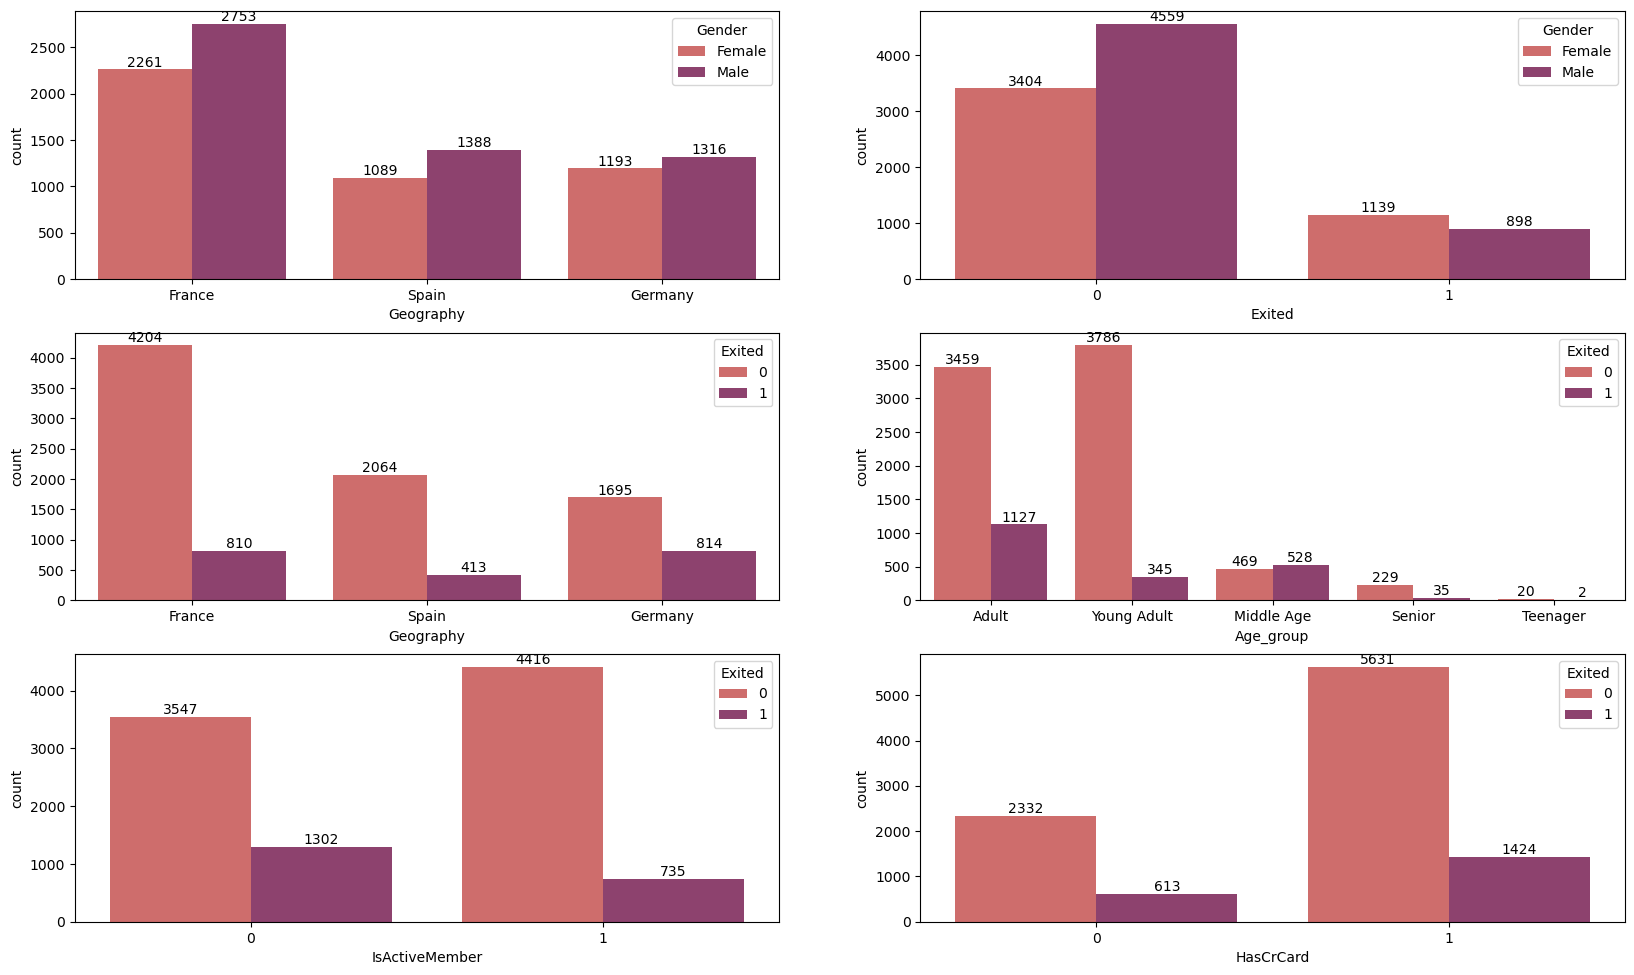

In [86]:
plt.figure(figsize=(20, 16))

plt.subplot(4, 2, 1)
ax = sns.countplot(x='Geography', data=df, hue='Gender', palette='flare')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.subplot(4, 2, 2)
ax = sns.countplot(x='Exited', data=df, hue='Gender', palette='flare')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.subplot(4, 2, 3)
ax = sns.countplot(x='Geography', data=df, hue='Exited', palette='flare')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.subplot(4, 2, 4)
ax = sns.countplot(x='Age_group', data=df, hue='Exited', palette='flare')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.subplot(4, 2, 5)
ax = sns.countplot(x='IsActiveMember', data=df, hue='Exited', palette='flare')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.subplot(4, 2, 6)
ax = sns.countplot(x='HasCrCard', data=df, hue='Exited', palette='flare')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.show()

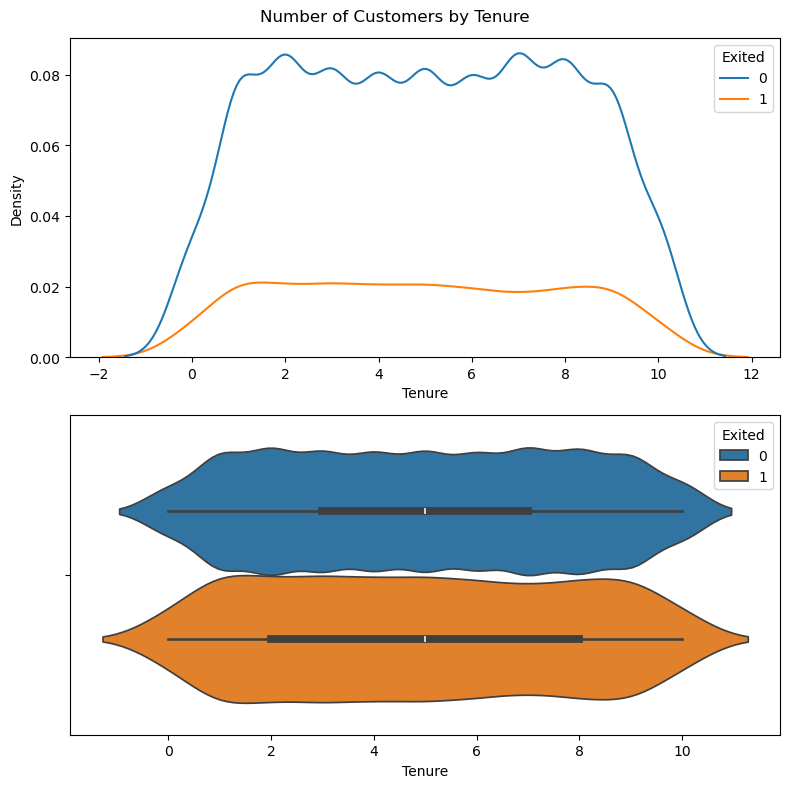

In [88]:
def plot_hist_violin_with_hue(column, hue):
    fig, axes = plt.subplots(2, 1, figsize=(8, 8))
    axes = axes.ravel()
    sns.kdeplot(data=df, x=column, ax=axes[0], hue=hue)
    sns.violinplot(data=df, x=column, ax=axes[1], hue=hue)
    fig.suptitle(f'Number of Customers by {column}')
    plt.tight_layout()
    plt.show()

plot_hist_violin_with_hue('Tenure', 'Exited')

>  **Conclusion** Customer churn is high in the early period and then slightly decreases over time.

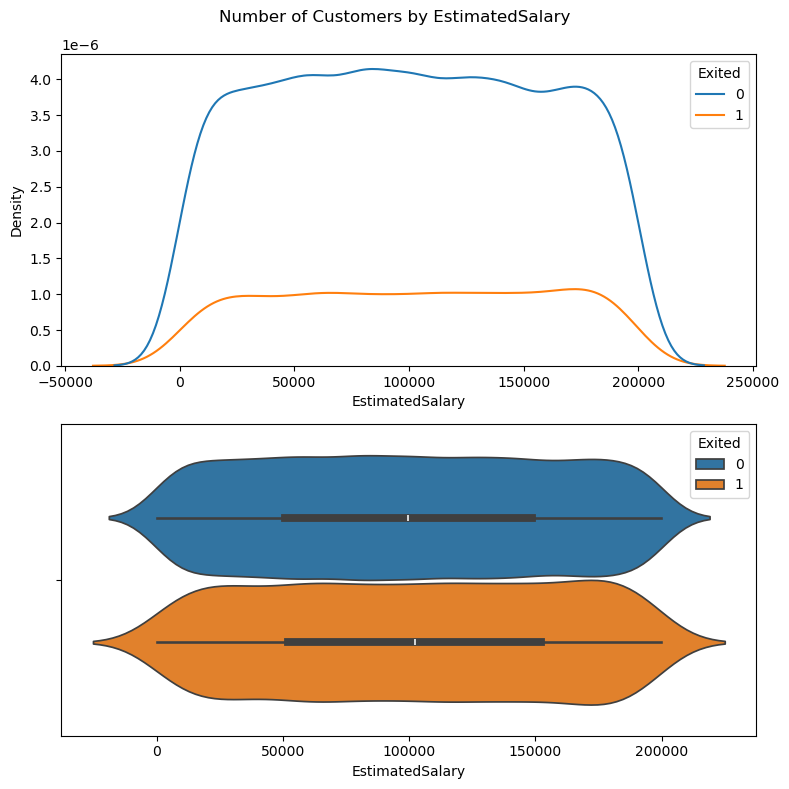

In [93]:
plot_hist_violin_with_hue('EstimatedSalary', 'Exited')

> **Conclusion** Low income is also a reason why customers leave, as they are unable to afford the payments.

In [96]:
df.select_dtypes(exclude='object')

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,42,3,75075.31,2,1,0,92888.52,1


<Axes: >

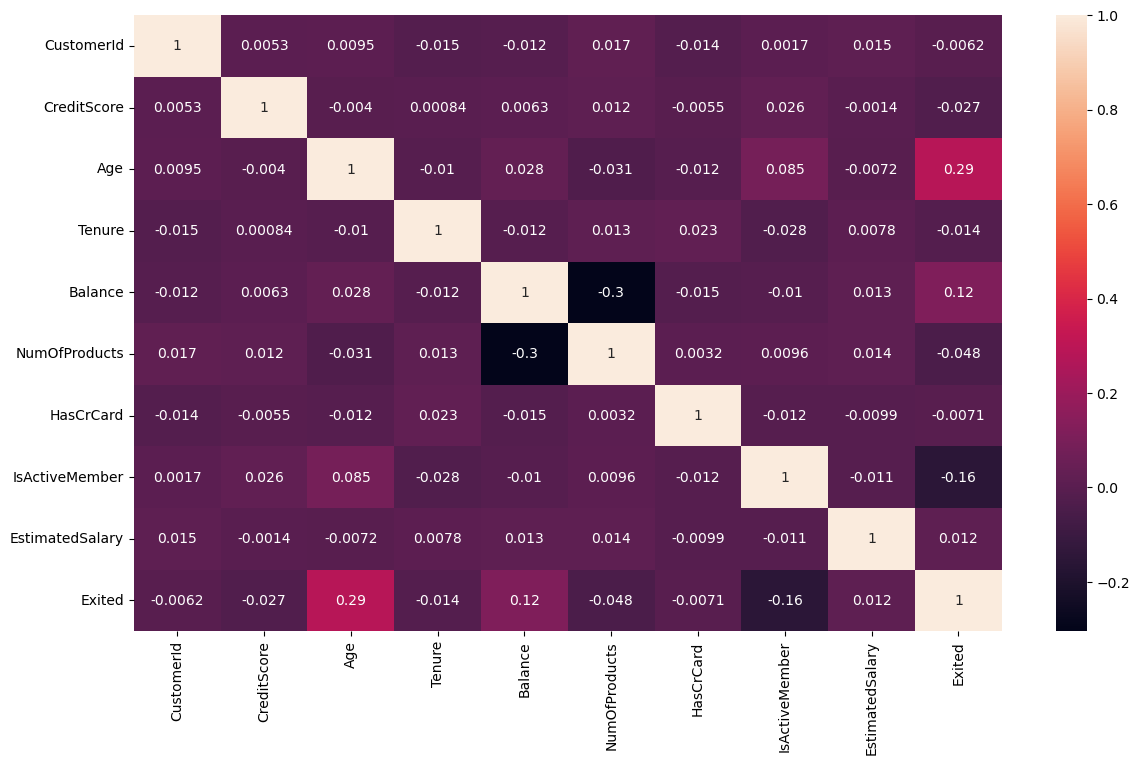

In [98]:
df_number = df.select_dtypes(exclude='object')
correlation_matrix = df_number.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True)

## Modelling

In [141]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder

In [143]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Age_group'] = le.fit_transform(df['Age_group'])

X = df.drop(columns=['Exited'])
y = df['Exited']
X

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Age_group
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,0
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,0
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,0,1,35,10,57369.61,1,1,1,101699.77,4
9997,15584532,709,0,0,36,7,0.00,1,0,1,42085.58,0
9998,15682355,772,1,1,42,3,75075.31,2,1,0,92888.52,0


In [144]:
from sklearn.preprocessing import StandardScaler
numeric_cols = df.select_dtypes(include=[int, float]).columns
X_numeric = df[numeric_cols]
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

In [147]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X_standard, y, test_size = 0.3, random_state = 0)

In [149]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train, y_train = ros.fit_resample(X_train, y_train)

## Logistic Regression

0.6873333333333334

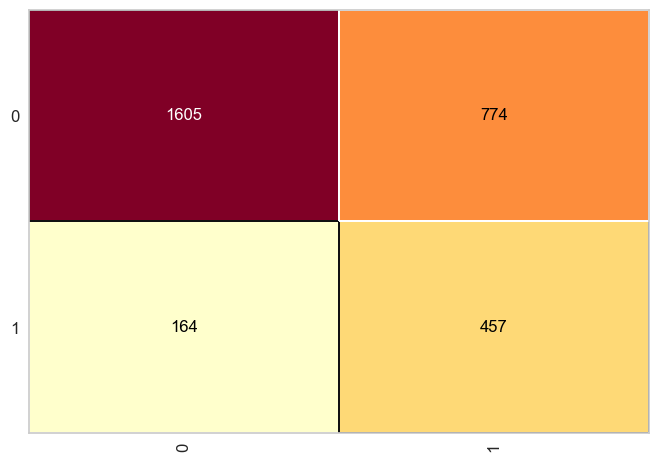

In [152]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state = 1, max_iter=1000)
logistic.fit(X_train, y_train)
previsoes = logistic.predict(X_test)

cm = ConfusionMatrix(logistic)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [153]:
classification_logistic = classification_report(y_test, previsoes)
print(classification_logistic)

              precision    recall  f1-score   support

           0       0.91      0.67      0.77      2379
           1       0.37      0.74      0.49       621

    accuracy                           0.69      3000
   macro avg       0.64      0.71      0.63      3000
weighted avg       0.80      0.69      0.72      3000



## Decision Tree

In [157]:
parameters = {'max_depth': [3, 4, 5, 6, 7, 9, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['entropy', 'gini']
             }

model = DecisionTreeClassifier()
gridDecisionTree = RandomizedSearchCV(model, parameters, cv = 3, n_jobs = -1)
gridDecisionTree.fit(X_train, y_train)

print('Min Split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Max Nvl: ', gridDecisionTree.best_estimator_.max_depth)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)
print('Score: ', gridDecisionTree.best_score_)

Min Split:  3
Max Nvl:  11
Algorithm:  entropy
Score:  0.8301397863290237


0.7803333333333333

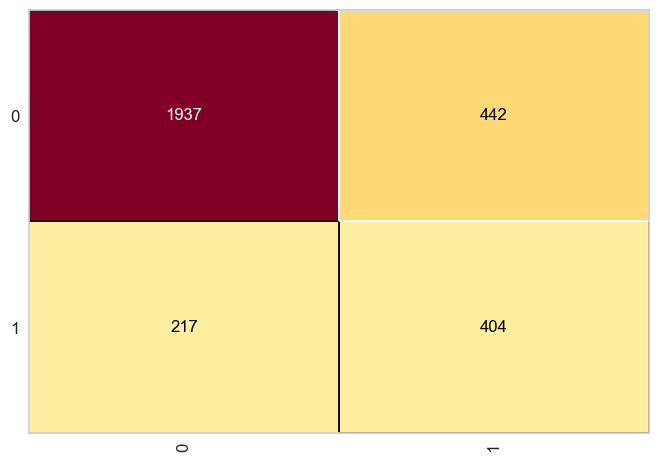

In [158]:
decision_tree = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 2, max_depth= 11, random_state=0)
decision_tree.fit(X_train, y_train)
previsoes = decision_tree.predict(X_test)

cm = ConfusionMatrix(decision_tree)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [159]:
classification_decision = (classification_report(y_test, previsoes))
print(classification_decision)

              precision    recall  f1-score   support

           0       0.90      0.81      0.85      2379
           1       0.48      0.65      0.55       621

    accuracy                           0.78      3000
   macro avg       0.69      0.73      0.70      3000
weighted avg       0.81      0.78      0.79      3000



## Random Forest

In [161]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'max_depth': [3, 4, 5, 6, 7, 9, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['entropy', 'gini']
             }

model = RandomForestClassifier()
gridRandomForest = RandomizedSearchCV(model, parameters, cv = 5, n_jobs = -1)
gridRandomForest.fit(X_train, y_train)

print('Algorithm: ', gridRandomForest.best_estimator_.criterion)
print('Score: ', gridRandomForest.best_score_)
print('Min Split: ', gridRandomForest.best_estimator_.min_samples_split)
print('Max Nvl: ', gridRandomForest.best_estimator_.max_depth)

Algorithm:  gini
Score:  0.7906510184780181
Min Split:  5
Max Nvl:  7


0.8223333333333334

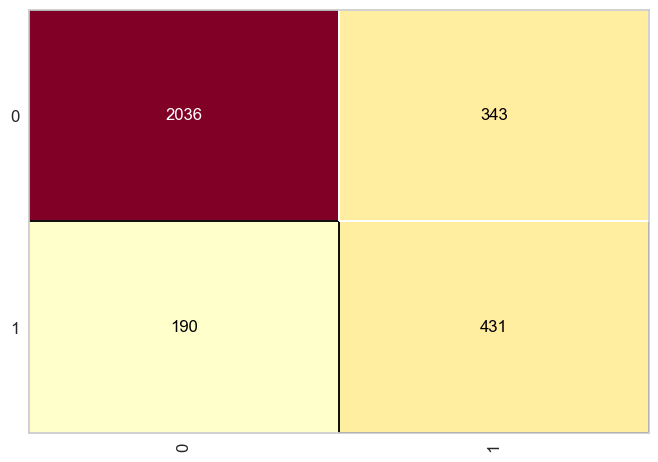

In [162]:
random_forest = RandomForestClassifier(n_estimators = 100, min_samples_split = 7, max_depth= 11,  criterion = 'entropy', random_state = 0)
random_forest.fit(X_train, y_train)
previsoes = random_forest.predict(X_test)

cm = ConfusionMatrix(random_forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [163]:
classification_random = (classification_report(y_test, previsoes))
print(classification_random)

              precision    recall  f1-score   support

           0       0.91      0.86      0.88      2379
           1       0.56      0.69      0.62       621

    accuracy                           0.82      3000
   macro avg       0.74      0.77      0.75      3000
weighted avg       0.84      0.82      0.83      3000



After training and evaluating three models — Logistic Regression, Decision Tree, and Random Forest — it is clear that Random Forest delivers the best performance in predicting customer churn.

Specifically:

Random Forest achieved the highest accuracy (82%), along with superior F1-score and recall compared to the other models.

Logistic Regression demonstrated good recall (0.74), indicating it can detect churners well, but its low precision (0.37) led to the lowest F1-score, making it less reliable.

Decision Tree performed moderately, better than Logistic Regression but not as well as Random Forest.

>  **Conclusion** Random Forest is the most suitable model for predicting customer churn, providing valuable insights to help the bank develop more effective customer retention strategies.